In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
loan = pd.read_csv("loan.csv", low_memory=False)
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [264]:
loan.shape

(39717, 111)

In [265]:
missing_col_val = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_col_val[missing_col_val> 0]



emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [256]:
loan.drop(missing_col_val[missing_col_val> 30 ].index, axis=1, inplace=True)

In [257]:
loan.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [266]:
loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [260]:
loan.nunique().sort_values(ascending=False).head(20)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
dtype: int64

In [267]:
loan.drop(['emp_title', 'title','member_id','url'], axis=1, inplace=True)

In [240]:

loan.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [53]:
missing_col_val = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_col_val[missing_col_val> 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [16]:
loan = loan[-loan.emp_length.isnull()]

In [17]:
loan = loan[-loan.revol_util.isnull()]

In [18]:
loan = loan[-loan.pub_rec_bankruptcies.isnull()]

In [19]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               37898
total_bal_ex_mort             37898
total_bc_limit                37898
total_il_high_credit_limit    37898
Length: 102, dtype: int64

In [20]:
loan.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64

In [21]:
loan = loan[loan.loan_status.isin(["Fully Paid","Charged Off"])]

In [22]:
loan.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Name: loan_status, dtype: int64

In [23]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 102, dtype: object

In [24]:
loan.int_rate = loan.int_rate.apply(lambda x : float(x[:-2]))

In [25]:
loan.int_rate.dtype

dtype('float64')

In [26]:
loan.revol_util = loan.revol_util.apply(lambda x :x[:-2])

In [27]:
loan.revol_util.value_counts()

        1157
6        418
5        398
2        397
4        383
        ... 
0.0        4
32.0       1
16.0       1
10.0       1
8.0        1
Name: revol_util, Length: 915, dtype: int64

In [28]:
loan.issue_d.value_counts()

Dec-11    1994
Nov-11    1970
Oct-11    1862
Sep-11    1837
Aug-11    1751
Jun-11    1674
Jul-11    1672
May-11    1554
Apr-11    1505
Mar-11    1400
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1096
Jul-10    1091
Oct-10    1083
Sep-10    1057
Aug-10    1055
Jun-10     991
May-10     894
Apr-10     806
Mar-10     717
Feb-10     604
Nov-09     601
Dec-09     596
Jan-10     583
Oct-09     544
Sep-09     447
Aug-09     407
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Dec-08     222
Nov-08     183
Apr-08     155
Mar-08     117
Oct-08      96
Jul-08      82
Aug-08      69
May-08      69
Jun-08      66
Sep-08      32
Feb-08       7
Jan-08       6
Aug-07       2
Nov-07       2
Dec-07       2
Oct-07       1
Name: issue_d, dtype: int64

In [29]:
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')

In [30]:
loan.issue_d.value_counts()

2011-12-01    1994
2011-11-01    1970
2011-10-01    1862
2011-09-01    1837
2011-08-01    1751
2011-06-01    1674
2011-07-01    1672
2011-05-01    1554
2011-04-01    1505
2011-03-01    1400
2011-01-01    1336
2011-02-01    1239
2010-12-01    1219
2010-11-01    1096
2010-07-01    1091
2010-10-01    1083
2010-09-01    1057
2010-08-01    1055
2010-06-01     991
2010-05-01     894
2010-04-01     806
2010-03-01     717
2010-02-01     604
2009-11-01     601
2009-12-01     596
2010-01-01     583
2009-10-01     544
2009-09-01     447
2009-08-01     407
2009-07-01     373
2009-06-01     354
2009-05-01     319
2009-04-01     288
2009-03-01     275
2009-02-01     259
2009-01-01     236
2008-12-01     222
2008-11-01     183
2008-04-01     155
2008-03-01     117
2008-10-01      96
2008-07-01      82
2008-05-01      69
2008-08-01      69
2008-06-01      66
2008-09-01      32
2008-02-01       7
2008-01-01       6
2007-08-01       2
2007-11-01       2
2007-12-01       2
2007-10-01       1
Name: issue_

In [31]:
loan.earliest_cr_line.value_counts()

Oct-99    352
Nov-98    348
Dec-98    326
Oct-00    326
Nov-99    305
         ... 
Feb-69      1
Apr-66      1
Jun-67      1
May-65      1
Nov-54      1
Name: earliest_cr_line, Length: 513, dtype: int64

In [32]:
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')

In [33]:
loan.earliest_cr_line.value_counts()

1999-10-01    352
1998-11-01    348
2000-10-01    326
1998-12-01    326
1999-11-01    305
             ... 
1971-06-01      1
2067-07-01      1
2056-09-01      1
1972-11-01      1
1972-05-01      1
Name: earliest_cr_line, Length: 513, dtype: int64

In [34]:
loan['issue_d_year'] = loan.issue_d.dt.year

In [35]:
loan.issue_d_year.value_counts()

2011    19794
2010    11196
2009     4699
2008     1104
2007        7
Name: issue_d_year, dtype: int64

In [36]:
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')

In [37]:
loan.issue_d_month.value_counts()

Dec    4033
Nov    3852
Oct    3586
Sep    3373
Aug    3284
Jul    3218
Jun    3085
May    2836
Apr    2754
Mar    2509
Jan    2161
Feb    2109
Name: issue_d_month, dtype: int64

In [38]:
loan['issue_d_weekday'] = loan.issue_d.dt.weekday

In [39]:
loan.issue_d_weekday.value_counts()

1    6886
3    6579
4    5238
5    4801
0    4777
2    4709
6    3810
Name: issue_d_weekday, dtype: int64

In [40]:
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year

In [41]:
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')

In [42]:
loan['approved_loan_amnt_ratio'] = round(loan.funded_amnt_inv*100/loan.loan_amnt,2)

In [43]:
loan.approved_loan_amnt_ratio.describe()

count    36800.000000
mean        94.824049
std         15.016760
min          0.000000
25%         98.410000
50%         99.970000
75%        100.000000
max        100.000000
Name: approved_loan_amnt_ratio, dtype: float64

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
#UNIVARIATE ANALYSIS

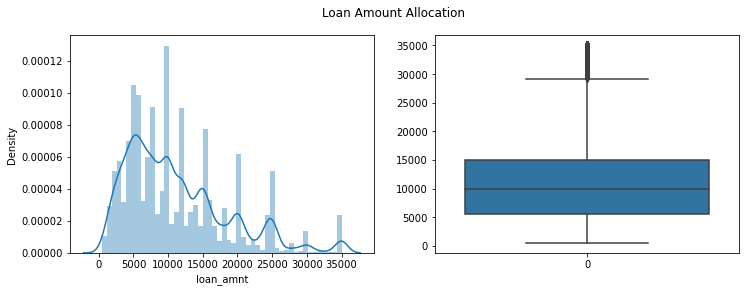

In [46]:
#loan_amnt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(loan.loan_amnt)
plt.subplot(1,2,2)
sns.boxplot(data=loan.loan_amnt)
plt.suptitle('Loan Amount Allocation')
plt.show()

In [47]:
round(loan.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

#result: Highest frequncy of loan amount is 10,000.Maximum people took loan under 30,000.

count    36800.00
mean     11149.54
std       7369.86
min        500.00
5%        2400.00
10%       3200.00
25%       5500.00
50%      10000.00
75%      15000.00
90%      22000.00
95%      25000.00
99%      35000.00
max      35000.00
Name: loan_amnt, dtype: float64

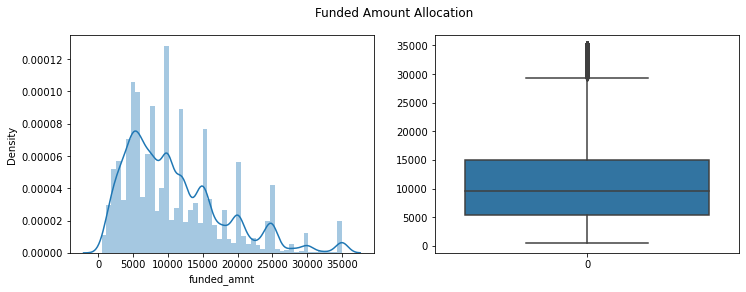

In [48]:
#funded_amnt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(loan.funded_amnt)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt)
plt.suptitle('Funded Amount Allocation')
plt.show()

In [49]:
round(loan.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

#result : pattern and figures for funded_amnt is same as loan_amnt.

count    36800.00
mean     10880.79
std       7109.16
min        500.00
5%        2400.00
10%       3200.00
25%       5400.00
50%       9600.00
75%      15000.00
90%      20375.00
95%      25000.00
99%      35000.00
max      35000.00
Name: funded_amnt, dtype: float64

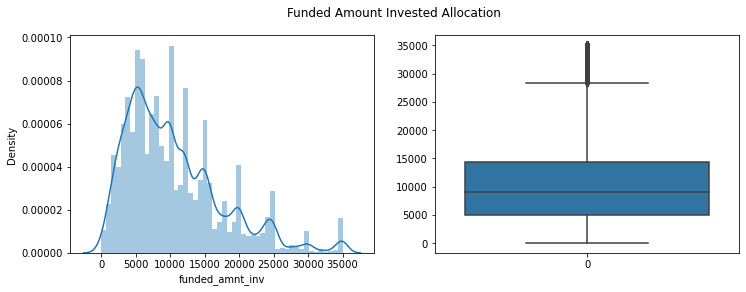

In [50]:
#funded_amnt_inv
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(loan.funded_amnt_inv)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt_inv)
plt.suptitle('Funded Amount Invested Allocation')
plt.show()

In [51]:
round(loan.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

#result : pattern and figures for funded_amnt is same as funded_amnt.

count    36800.00
mean     10439.06
std       7008.52
min          0.00
5%        2000.00
10%       3000.00
25%       5000.00
50%       9000.00
75%      14350.00
90%      20000.00
95%      24655.82
99%      34725.00
max      35000.00
Name: funded_amnt_inv, dtype: float64

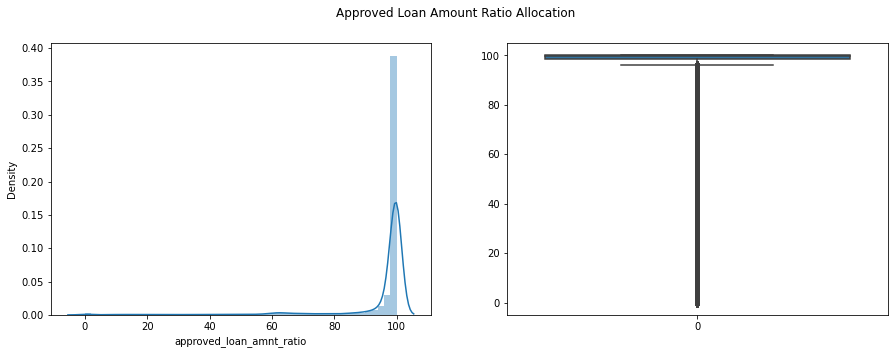

In [52]:
#approved_loan_amnt_ratio
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loan.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=loan.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio Allocation')
plt.show()

In [53]:
round(loan.approved_loan_amnt_ratio.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

#result : About 75 % people got full loan amount asked.

count    36800.00
mean        94.82
std         15.02
min          0.00
5%          62.90
10%         87.01
25%         98.41
50%         99.97
75%        100.00
90%        100.00
95%        100.00
99%        100.00
max        100.00
Name: approved_loan_amnt_ratio, dtype: float64

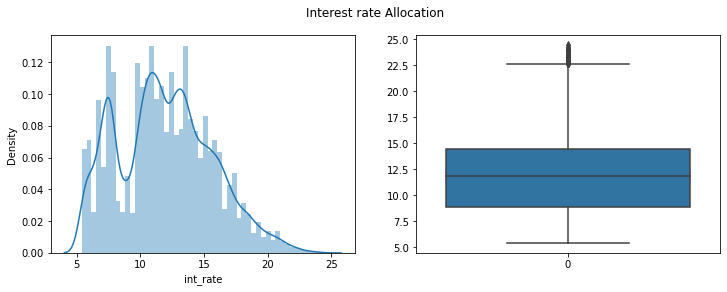

In [54]:
#int_rate
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(loan.int_rate)
plt.subplot(1,2,2)
sns.boxplot(data=loan.int_rate)
plt.suptitle('Interest rate Allocation')
plt.show()

In [55]:
round(loan.int_rate.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

count    36800.00
mean        11.93
std          3.70
min          5.40
5%           6.10
10%          7.10
25%          8.90
50%         11.80
75%         14.40
90%         16.80
95%         18.30
99%         20.90
max         24.40
Name: int_rate, dtype: float64

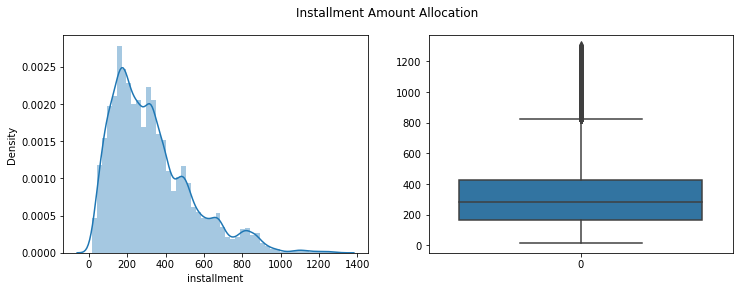

In [56]:
#installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(loan.installment)
plt.subplot(1,2,2)
sns.boxplot(data=loan.installment)
plt.suptitle('Installment Amount Allocation')
plt.show()

In [57]:
round(loan.installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

count    36800.00
mean       324.91
std        208.89
min         16.08
5%          73.05
10%        100.63
25%        167.73
50%        280.11
75%        429.37
90%        622.97
95%        763.56
99%        933.05
max       1305.19
Name: installment, dtype: float64

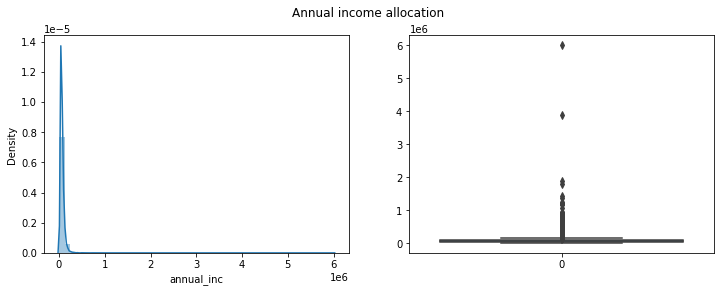

In [58]:
# annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(loan.annual_inc)
plt.subplot(1,2,2)
sns.boxplot(data=loan.annual_inc)
plt.suptitle('Annual income allocation')
plt.show()

In [59]:
round(loan.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

count      36800.00
mean       69434.48
std        64021.59
min         4000.00
5%         24000.00
10%        30000.00
25%        41133.00
50%        60000.00
75%        83000.00
90%       116738.90
95%       142000.00
99%       235000.00
max      6000000.00
Name: annual_inc, dtype: float64

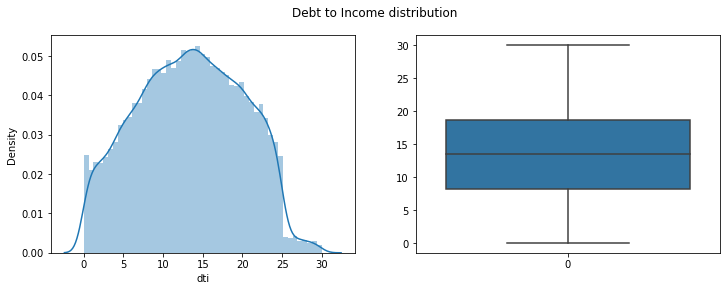

In [60]:

#dti
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(loan.dti)
plt.subplot(1,2,2)
sns.boxplot(data=loan.dti)
plt.suptitle('Debt to Income distribution')
plt.show()

In [61]:
round(loan.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]),2)

#result : No loan to be awarded if dti exceeds 30

count    36800.00
mean        13.33
std          6.65
min          0.00
5%           2.19
10%          4.15
25%          8.22
50%         13.43
75%         18.59
90%         22.32
95%         23.81
99%         26.54
max         29.99
Name: dti, dtype: float64

In [62]:
loan.pub_rec.value_counts()

0    34871
1     1875
2       45
3        7
4        2
Name: pub_rec, dtype: int64

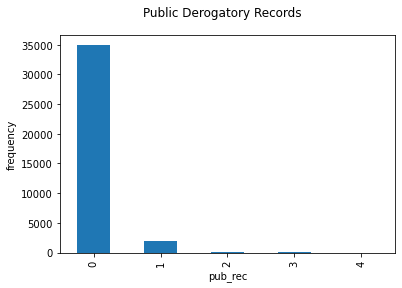

In [63]:
#pub_rec
#showing actual frequency of pub_rec values
loan.pub_rec.value_counts().plot.bar()
plt.xlabel('pub_rec')
plt.ylabel('frequency')
plt.suptitle('Public Derogatory Records')
plt.show()

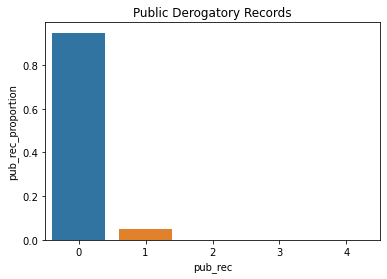

In [64]:
#pub_rec
#Percentage of each values of pub_rec
per_df = loan.pub_rec.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y="pub_rec", data=per_df)
plt.xlabel('pub_rec')
plt.ylabel('pub_rec_proportion')
plt.title('Public Derogatory Records')
plt.show()

#result : More than 80% people do not have bad reputation.

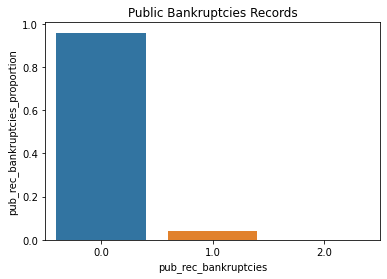

In [65]:
#pub_rec_bankruptcies
#Percentage of each values of pub_rec_bankruptcies
per_df = loan.pub_rec_bankruptcies.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y="pub_rec_bankruptcies", data=per_df)
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('pub_rec_bankruptcies_proportion')
plt.title('Public Bankruptcies Records')
plt.show()

#result : More than 80% people are not bankrupted.

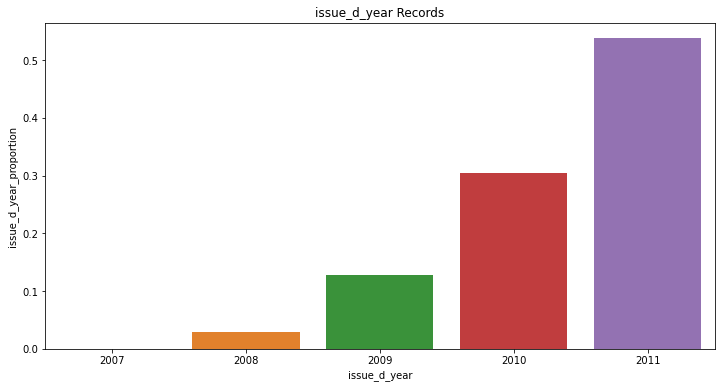

In [66]:
#issue_d_year
#Percentage of each values of issue_d_year
per_df = loan.issue_d_year.value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='index', y="issue_d_year", data=per_df)
plt.xlabel('issue_d_year')
plt.ylabel('issue_d_year_proportion')
plt.title('issue_d_year Records')
plt.show()

#result : Maximum loans were given in the year 2011.



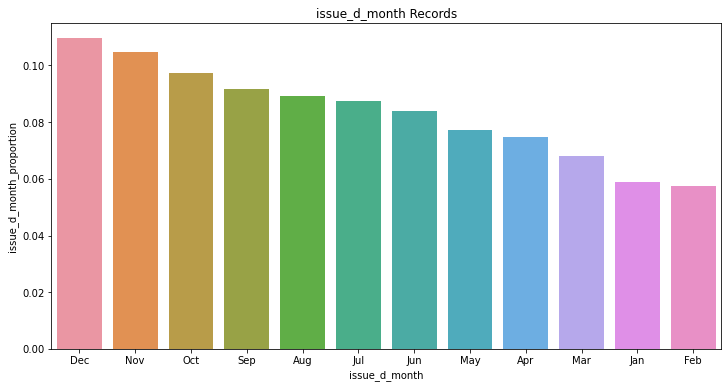

In [67]:
#issue_d_month
#Percentage of each values of issue_d_year
per_df = loan.issue_d_month.value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='index', y="issue_d_month", data=per_df)
plt.xlabel('issue_d_month')
plt.ylabel('issue_d_month_proportion')
plt.title('issue_d_month Records')

plt.show()

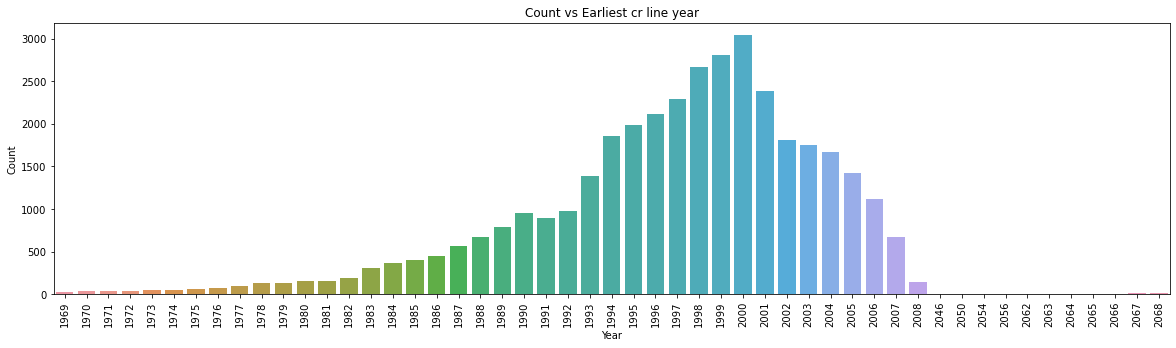

In [68]:
#earliest_cr_line_year

plt.figure(figsize=(20,5))
sns.countplot(loan.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#maximum loans were given in the year 2000.

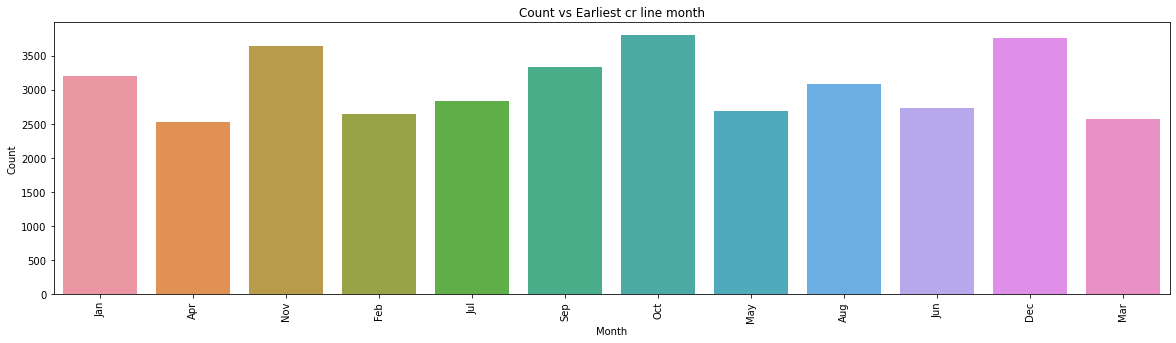

In [69]:
#earliest_cr_line_month

plt.figure(figsize=(20,5))
sns.countplot(loan.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

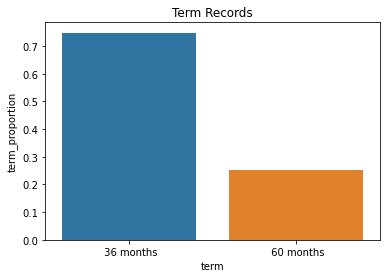

In [70]:
#term
#Percentage of each values of term
per_df = loan.term.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y="term", data=per_df)
plt.xlabel('term')
plt.ylabel('term_proportion')
plt.title('Term Records')
plt.show()

#More borrowers have opted for 36 months loan plan.

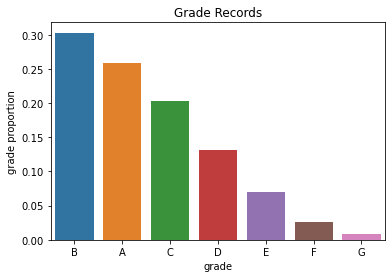

In [71]:
#grade
#Percentage of each values of grade
per_df = loan.grade.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y="grade", data=per_df)
plt.xlabel('grade')
plt.ylabel('grade proportion')
plt.title('Grade Records')
plt.show()


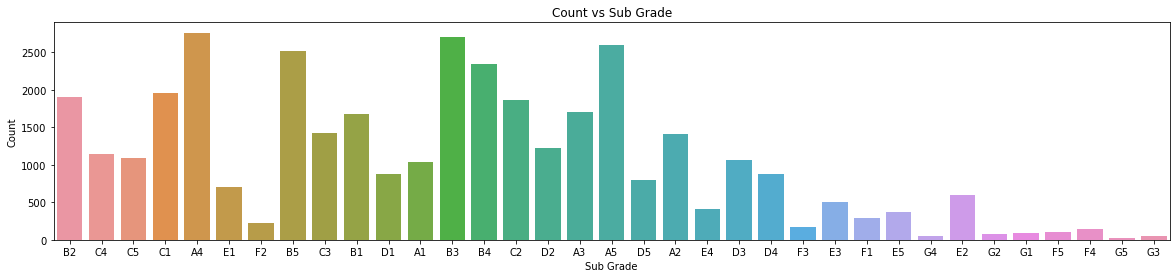

In [72]:
#subgrade
plt.figure(figsize=(20,4))
sns.countplot(loan.sub_grade)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

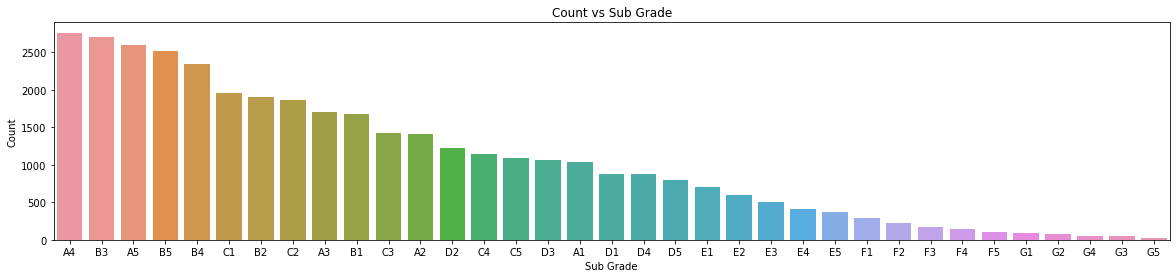

In [73]:
#subgrade in descending order
plt.figure(figsize=(20,4))
sns.countplot(loan.sub_grade,order=loan.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()


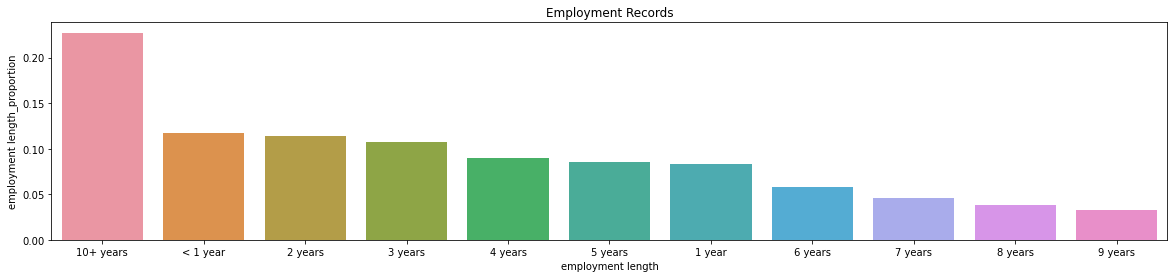

In [74]:
#emp_length
#Percentage of each values of employment length
per_df = loan.emp_length.value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,4))
sns.barplot(x='index', y="emp_length", data=per_df)
plt.xlabel('employment length')
plt.ylabel('employment length_proportion')
plt.title('Employment Records')
plt.show()

# Maximum loans were taken by borrowers who had experience of more than 10 years in job.

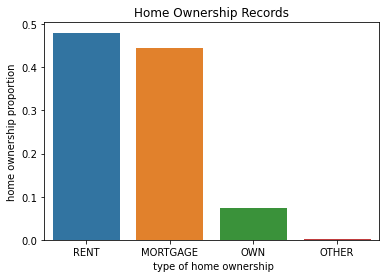

In [75]:
#home_ownership
#Percentage of each values of home ownership
per_df = loan.home_ownership.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y="home_ownership", data=per_df)
plt.xlabel(' type of home ownership')
plt.ylabel('home ownership proportion')
plt.title('Home Ownership Records')
plt.show()

#Maximum borrowers live on rent.

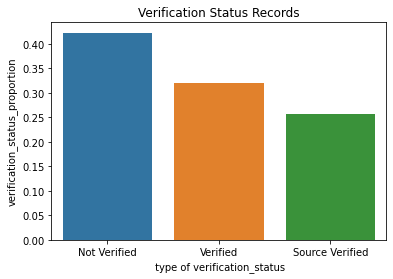

In [76]:
# verification_status
#Percentage of each values of verification status
per_df = loan.verification_status.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y="verification_status", data=per_df)
plt.xlabel(' type of verification_status')
plt.ylabel('verification_status_proportion')
plt.title('Verification Status Records')
plt.show()

#Maximun loans were not verified.

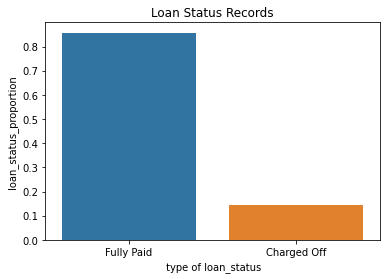

In [77]:
# LOAN STATUS
#Percentage of each values of loan status
per_df = loan.loan_status.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y="loan_status", data=per_df)
plt.xlabel(' type of loan_status')
plt.ylabel('loan_status_proportion')
plt.title('Loan Status Records')
plt.show()

#MAXIMUM LOANS WERE FULLY PAID.IT ACCOUNTS FOR MORE THAN 80%.

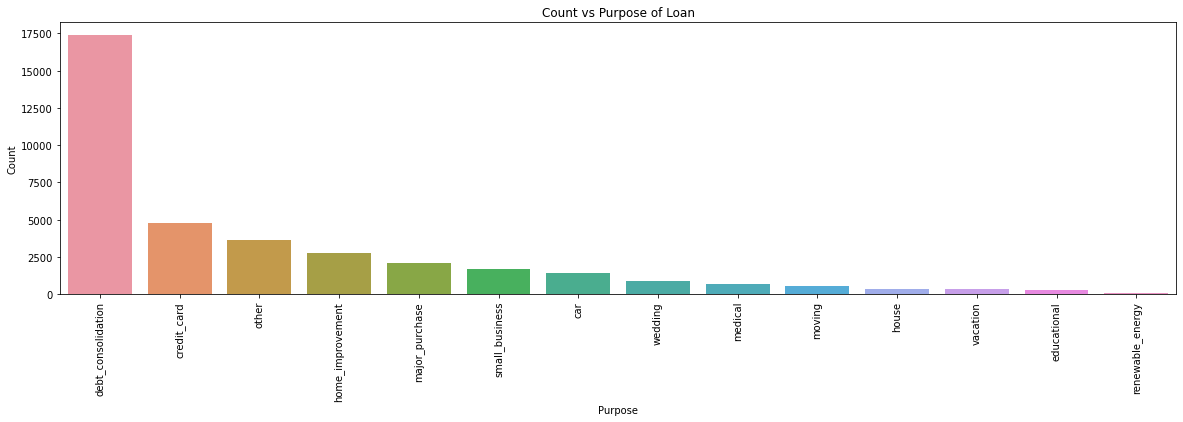

In [78]:
#PURPOSE OF LOAN 
plt.figure(figsize=(20,5))
sns.countplot(loan.purpose,order=loan.purpose.value_counts().index)
plt.title('Count vs Purpose of Loan')
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

#Most loans were taken for debt management and credit card scores settlement.

In [79]:
# SEGMENTED UNIVARIATE ANALYSIS

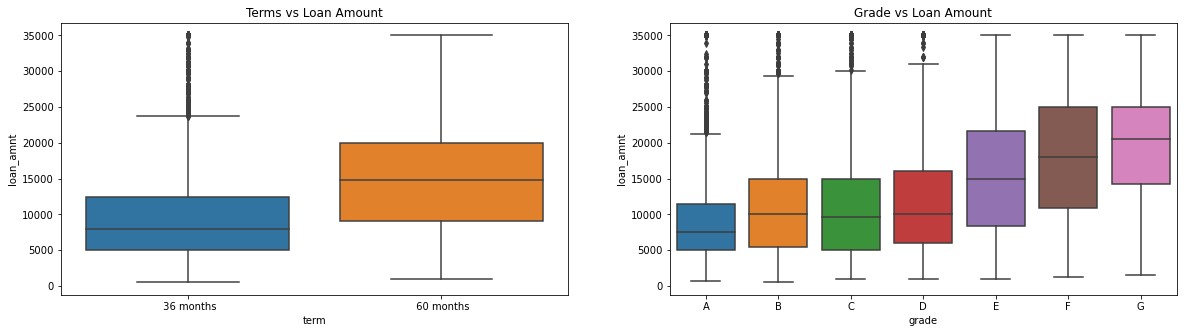

In [121]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)
plt.title('Terms vs Loan Amount')

plt.subplot(1,2,2)
plt.title('Grade vs Loan Amount')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.loan_amnt,order = grade_ord,data=loan )

plt.show()

# High loans belongs to 60 months category.
#Grade G took maximum loan amount.As grades of borrowers decrease loan amount increases. 

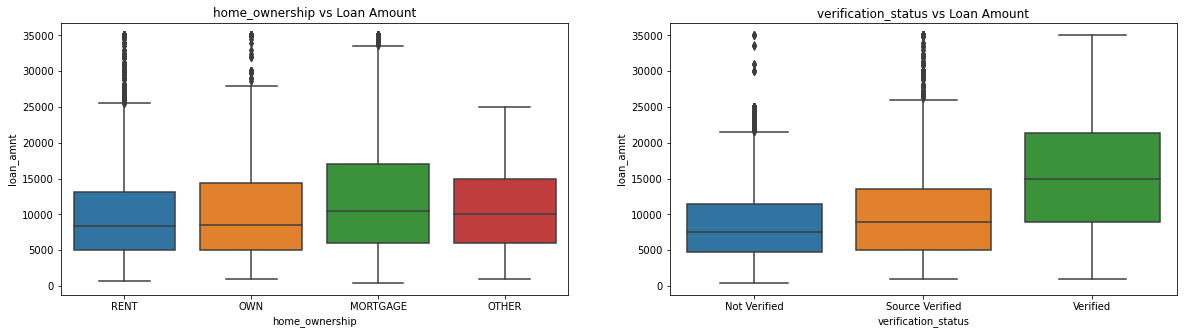

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan)
plt.title('home_ownership vs Loan Amount')

plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.loan_amnt, order = verification_status_ord, data=loan)

plt.show()

#Mortgaged borrowers took maximum loan.

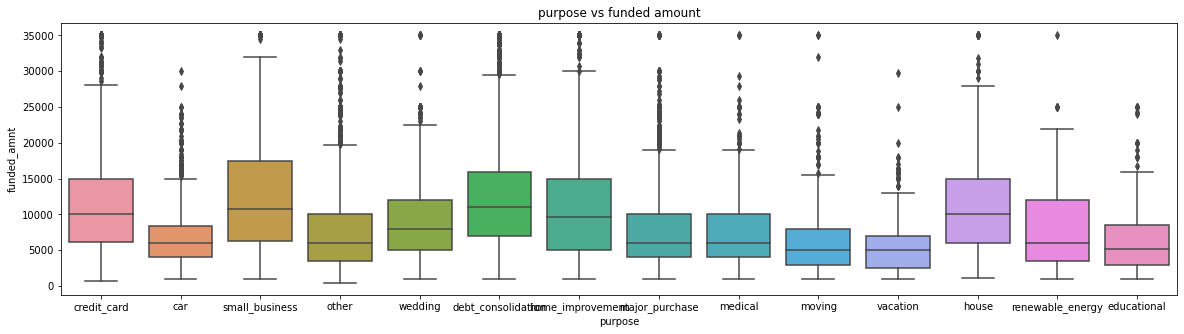

In [82]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.funded_amnt,data=loan)
plt.title('purpose vs funded amount')
plt.show()

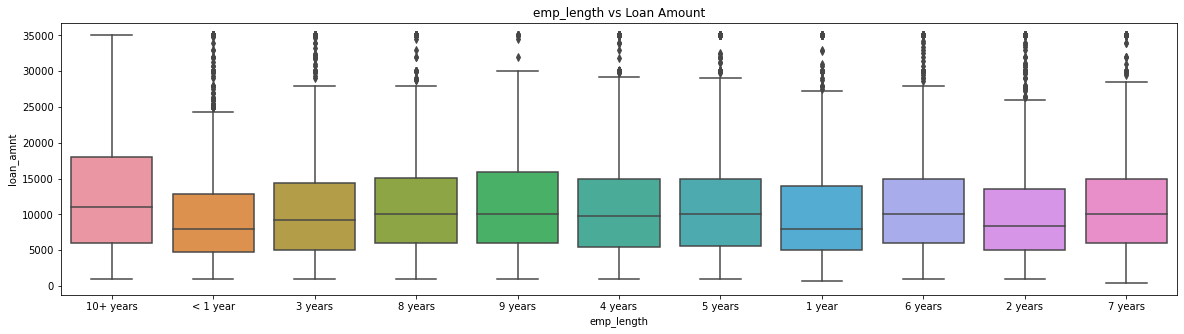

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.loan_amnt, data=loan)
plt.title('emp_length vs Loan Amount')
plt.show()

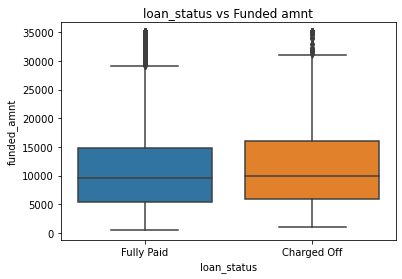

In [84]:
sns.boxplot(x='loan_status', y=loan.funded_amnt, data=loan)
plt.title('loan_status vs Funded amnt')
plt.show()

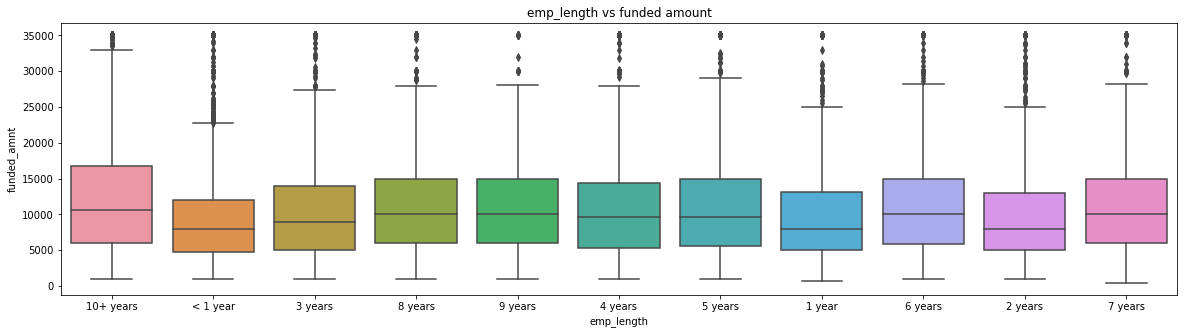

In [85]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.funded_amnt, data=loan)
plt.title('emp_length vs funded amount')
plt.show()

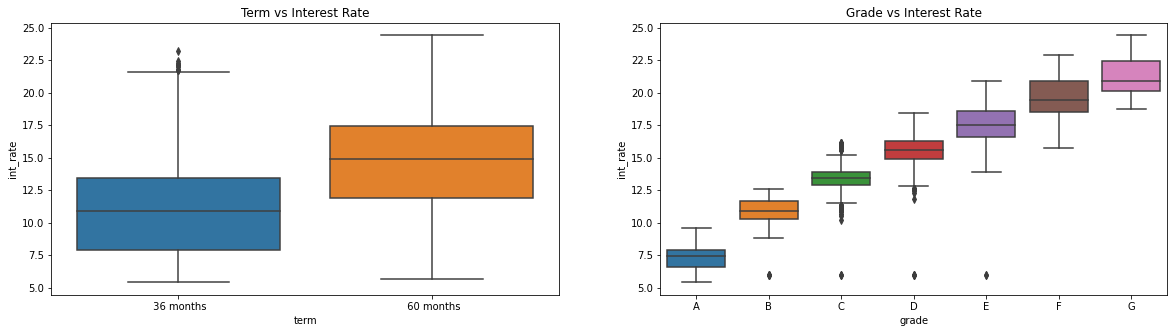

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y=loan.int_rate, data=loan)
plt.title('Term vs Interest Rate')

plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.int_rate, order = grade_ord, data=loan)

plt.show()

# we can see that lower grade employees are offered higher interest rates.
#High tenure loans are offered higher interest rates.

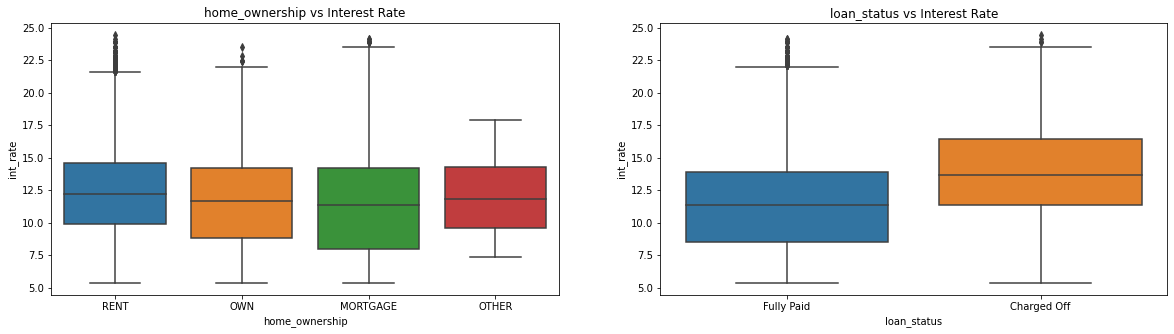

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y=loan.int_rate, data=loan)
plt.title('home_ownership vs Interest Rate')

plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y=loan.int_rate, data=loan)
plt.title('loan_status vs Interest Rate')

plt.show()

# Greater the interest rate ,more the chance of defaulting the lone

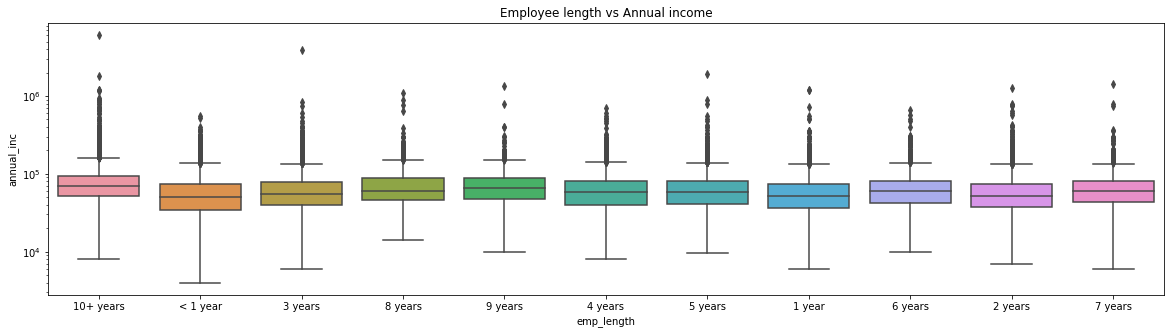

In [88]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.annual_inc, data=loan)
plt.title('Employee length vs Annual income')
plt.yscale('log')

#Higher experience people have higher annual income

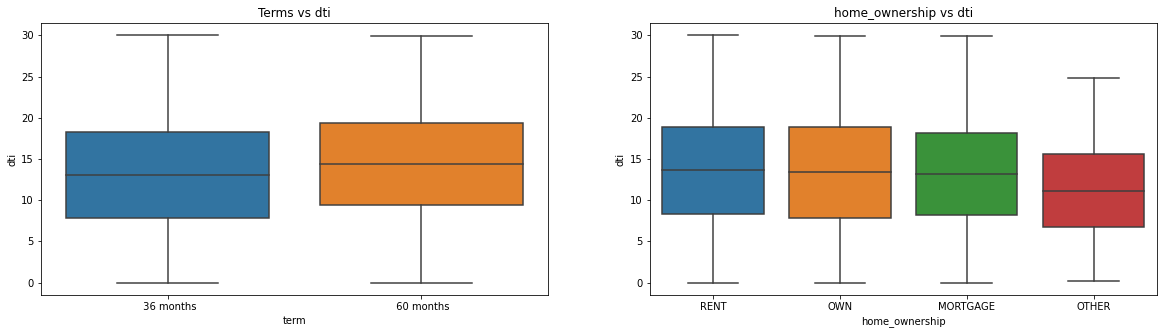

In [89]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x='term', y=loan.dti, data=loan)
plt.title('Terms vs dti')

plt.subplot(1,2,2)
sns.boxplot(x='home_ownership', y=loan.dti, data=loan)
plt.title('home_ownership vs dti')

plt.show()



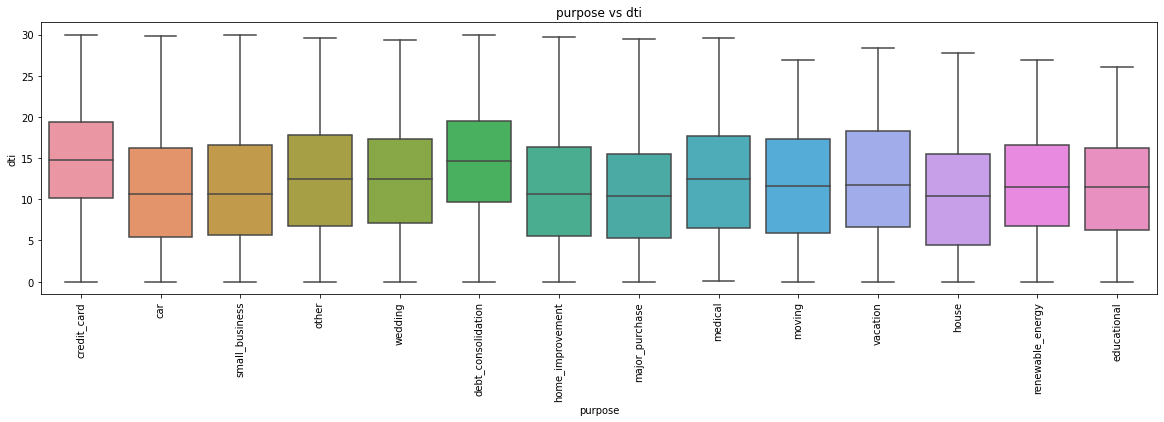

In [90]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.dti, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs dti')
plt.show()

#Credit card holders are at higher stakes of dti.

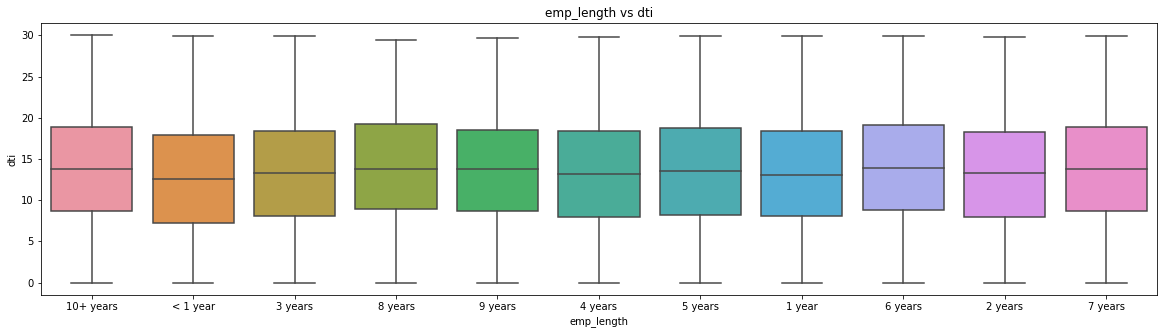

In [92]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.dti, data=loan)
plt.title('emp_length vs dti')
plt.show()

In [93]:
#BIVARIATE ANALYSIS

In [94]:
df = loan.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = round(df.groupby('pub_rec').transform(lambda x: x/x.sum()),2)
df



,pub_rec,term,id,proportion
0,0,36 months,26152,0.75
1,0,60 months,8719,0.25
2,1,36 months,1349,0.72
3,1,60 months,526,0.28
4,2,36 months,36,0.80
5,2,60 months,9,0.20
6,3,36 months,7,1.00
7,4,36 months,2,1.00


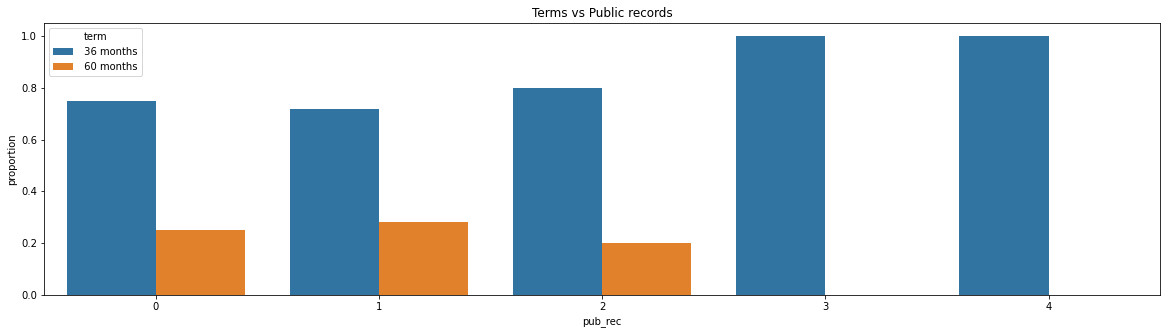

In [95]:
# term vs pub_rec
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')
plt.show()

#In all possible cases of no. of public derogatory records, 36 months tenure is on higher side.

In [96]:
df = loan.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = round(df.groupby('pub_rec').transform(lambda x: x/x.sum()),2)
df

,pub_rec,grade,id,proportion
0,0,A,9384,0.27
1,0,B,10561,0.30
2,0,C,6925,0.20
3,0,D,4497,0.13
4,0,E,2378,0.07
5,0,F,856,0.02
6,0,G,270,0.01
7,1,A,132,0.07
8,1,B,576,0.31
9,1,C,529,0.28


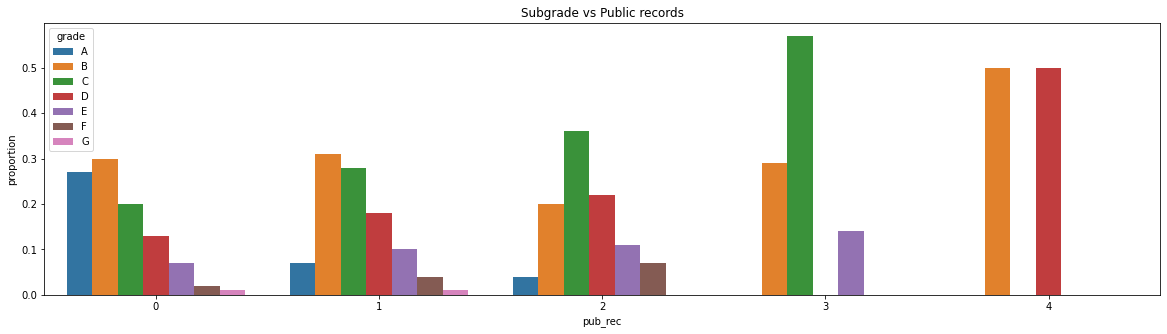

In [97]:
# subgrade vs pub_rec
plt.figure(figsize=(20,5))
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)
plt.title('Subgrade vs Public records')
plt.show()

In [98]:
df = loan.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = round(df.groupby('pub_rec').transform(lambda x: x/x.sum()),2)
df

,pub_rec,home_ownership,id,proportion
0,0,MORTGAGE,15341,0.44
1,0,OTHER,93,0.00
2,0,OWN,2582,0.07
3,0,RENT,16855,0.48
4,1,MORTGAGE,966,0.52
5,1,OTHER,3,0.00
6,1,OWN,117,0.06
7,1,RENT,789,0.42
8,2,MORTGAGE,23,0.51
9,2,OWN,3,0.07


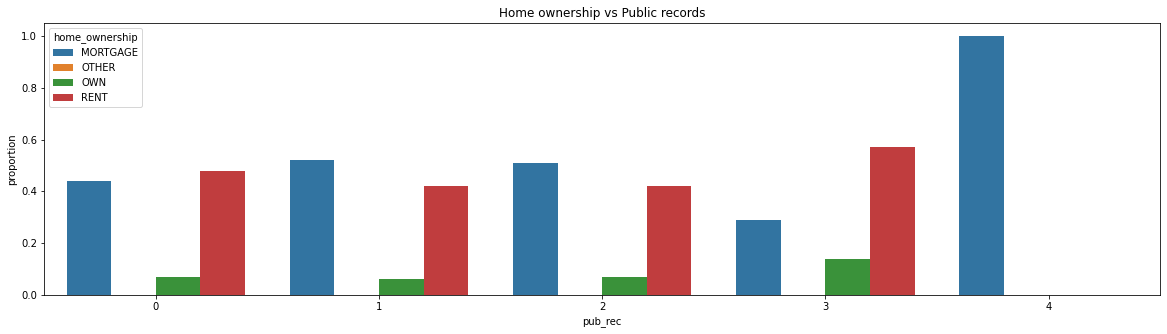

In [99]:
#Home ownership vs Public records
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')
plt.show()

#Borrowers with high public derogatory records live in mortgaged houses.

In [100]:
df = loan.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

,pub_rec,verification_status,id,proportion
0,0,Not Verified,14671,0.420722
1,0,Source Verified,9018,0.258610
2,0,Verified,11182,0.320668
3,1,Not Verified,854,0.455467
4,1,Source Verified,452,0.241067
5,1,Verified,569,0.303467
6,2,Not Verified,24,0.533333
7,2,Source Verified,12,0.266667
8,2,Verified,9,0.200000
9,3,Not Verified,3,0.428571


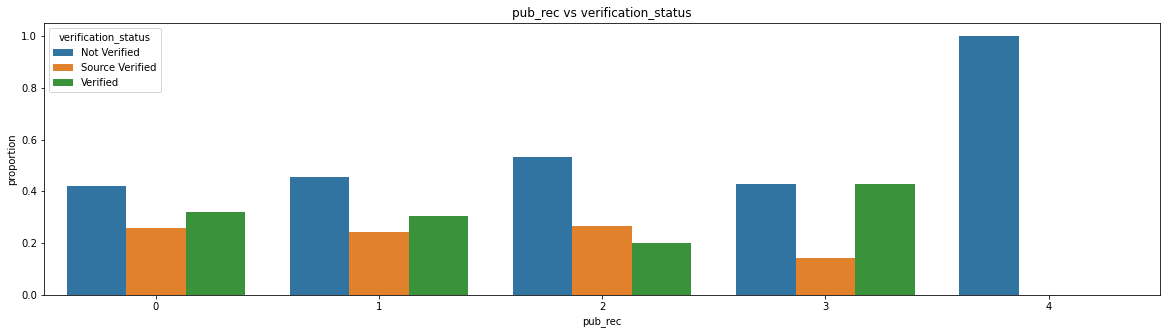

In [101]:
# pub_rec vs verification_status

plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)
plt.title('pub_rec vs verification_status')
plt.show()

#It seems that in most derogatory cases, verification not done status is present substantially.

In [102]:
df = loan.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

,pub_rec,loan_status,id,proportion
0,0,Charged Off,4838,0.138740
1,0,Fully Paid,30033,0.861260
2,1,Charged Off,418,0.222933
3,1,Fully Paid,1457,0.777067
4,2,Charged Off,10,0.222222
5,2,Fully Paid,35,0.777778
6,3,Fully Paid,7,1.000000
7,4,Fully Paid,2,1.000000


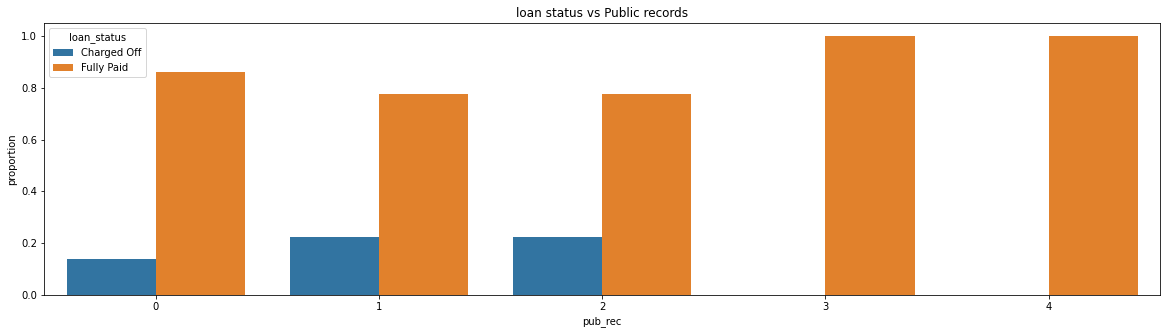

In [103]:
#loan status vs Public records
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)
plt.title('loan status vs Public records')
plt.show()

In [104]:
df = loan.groupby(['pub_rec', 'purpose'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

,pub_rec,purpose,id,proportion
0,0,car,1352,0.038771
1,0,credit_card,4542,0.130251
2,0,debt_consolidation,16423,0.470964
3,0,educational,283,0.008116
4,0,home_improvement,2574,0.073815
5,0,house,330,0.009463
6,0,major_purchase,1981,0.056809
7,0,medical,593,0.017006
8,0,moving,520,0.014912
9,0,other,3446,0.098821


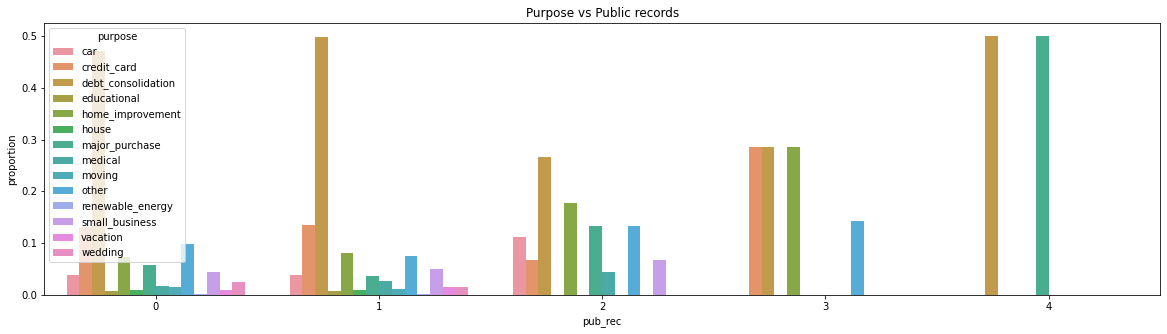

In [105]:
#Purpose vs Public records
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='proportion', hue='purpose', data=df)
plt.title('Purpose vs Public records')
plt.show()

In [106]:
df = loan.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

,pub_rec,emp_length,id,proportion
0,0,1 year,2964,0.084999
1,0,10+ years,7746,0.222133
2,0,2 years,4038,0.115798
3,0,3 years,3772,0.108170
4,0,4 years,3141,0.090075
5,0,5 years,2996,0.085917
6,0,6 years,2009,0.057612
7,0,7 years,1581,0.045339
8,0,8 years,1320,0.037854
9,0,9 years,1131,0.032434


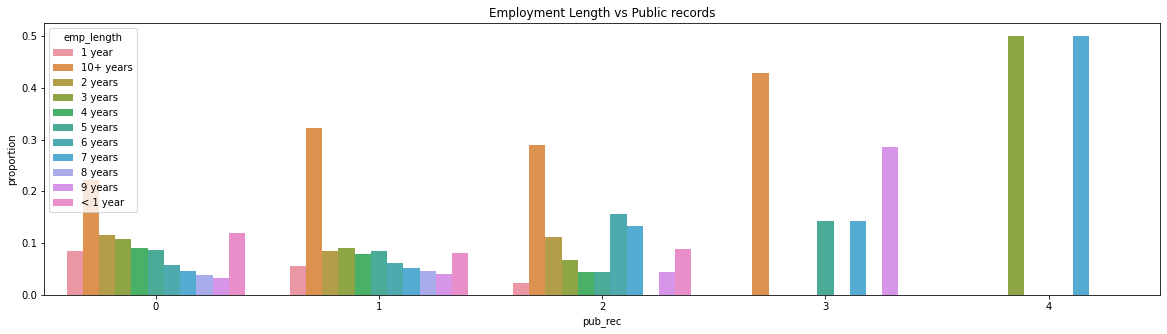

In [107]:
#Employment Length vs Public records
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employment Length vs Public records')
plt.show()

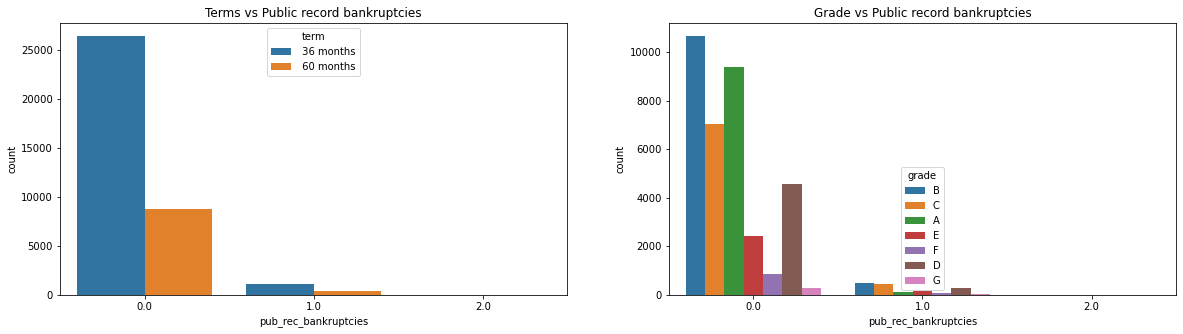

In [166]:
#Absolute count of parameters(term and grade) against public bankruptcies records.

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(loan.pub_rec_bankruptcies, hue='term', data=loan)
plt.title('Terms vs Public record bankruptcies')

plt.subplot(1,2,2)
plt.title('Grade vs Public record bankruptcies')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.countplot(loan.pub_rec_bankruptcies, hue='grade', data=loan)

plt.show()


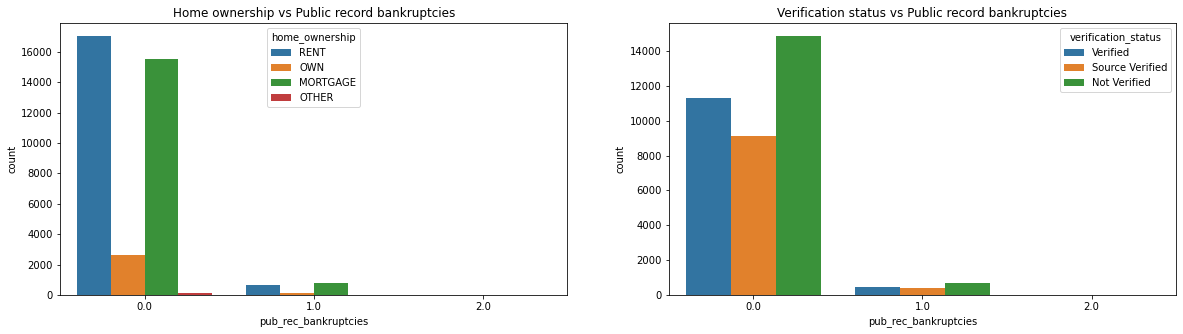

In [109]:
##Absolute count of parameters(Home ownership,Verification status) against public bankruptcies records.

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(loan.pub_rec_bankruptcies, hue='home_ownership', data=loan)
plt.title('Home ownership vs Public record bankruptcies')

plt.subplot(1,2,2)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.countplot(loan.pub_rec_bankruptcies, hue='verification_status', data=loan)

plt.show()

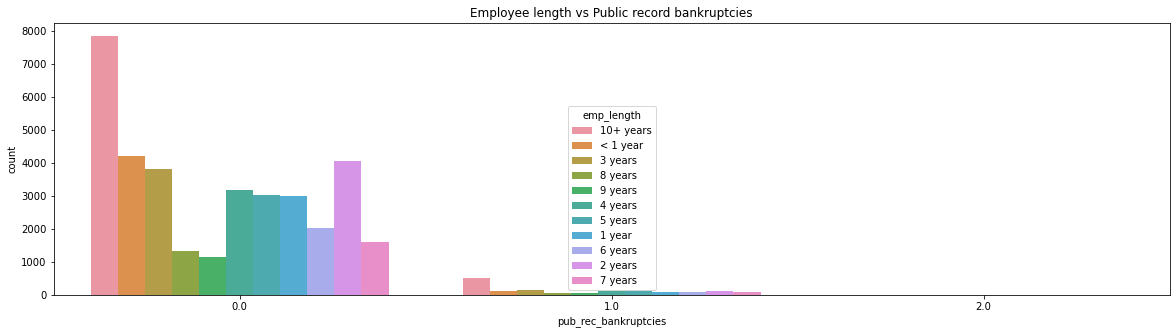

In [110]:
plt.figure(figsize=(20,5))
sns.countplot(loan.pub_rec_bankruptcies, hue='emp_length', data=loan)
plt.title('Employee length vs Public record bankruptcies')
plt.show()

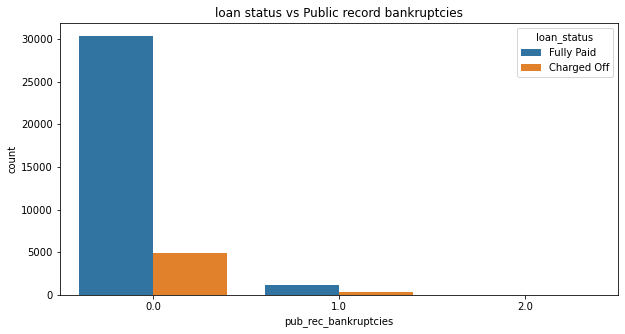

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(loan.pub_rec_bankruptcies, hue='loan_status', data=loan)
plt.title('loan status vs Public record bankruptcies')
plt.show()

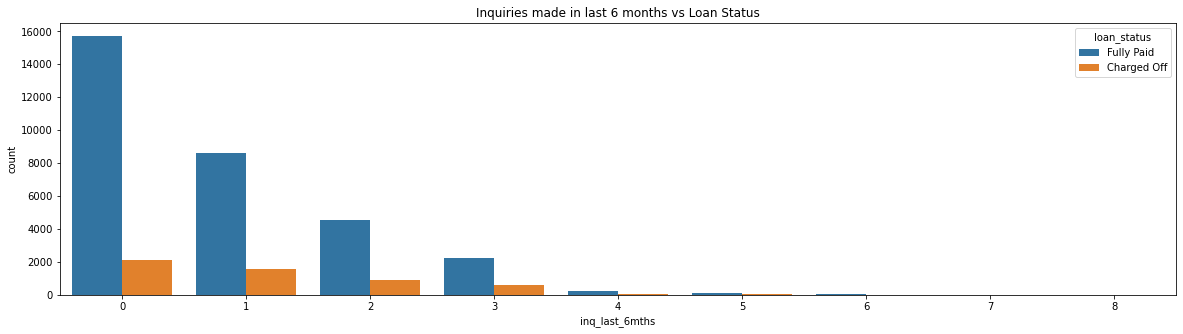

In [112]:
plt.figure(figsize=(20,5))
sns.countplot(loan.inq_last_6mths, hue='loan_status', data=loan)
plt.title('Inquiries made in last 6 months vs Loan Status')
plt.show()

#Its quite much clear that borrowers with label as bankrupted did not asked for loans. 

In [113]:
df = loan.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
df

,term,loan_status,id,proportion
0,36 months,Charged Off,2943,0.106839
1,36 months,Fully Paid,24603,0.893161
2,60 months,Charged Off,2323,0.251027
3,60 months,Fully Paid,6931,0.748973


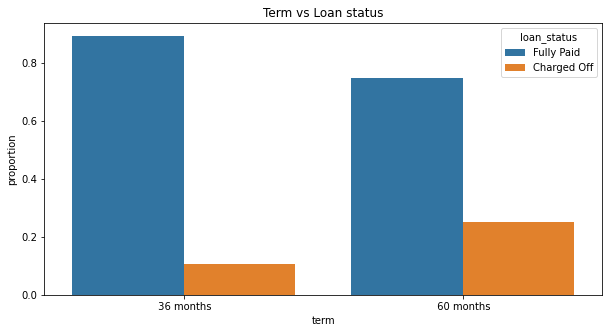

In [117]:
# term vs loan status
plt.figure(figsize=(10,5))
sns.barplot(x='term', y='proportion', hue='loan_status',hue_order = ['Fully Paid', 'Charged Off'],data=df)
plt.title('Term vs Loan status')
plt.show()

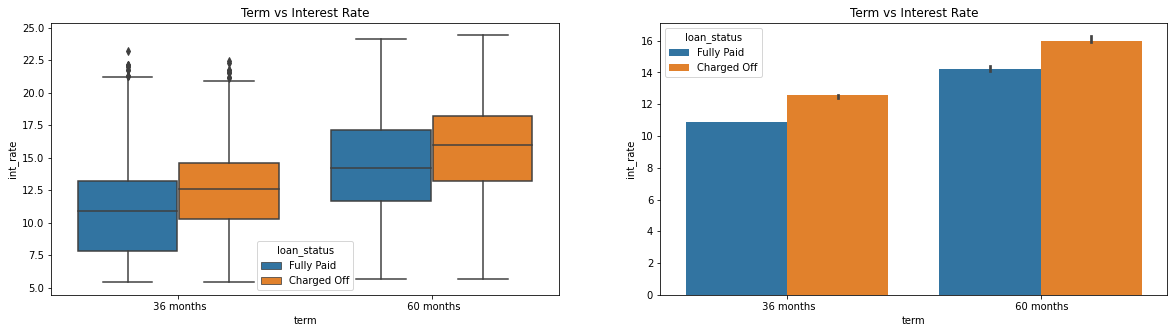

In [119]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan)
plt.title('Term vs Interest Rate')

plt.subplot(1,2,2)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs Interest Rate')

plt.show()

# High interest rates is seen for defaulters in both terms. 


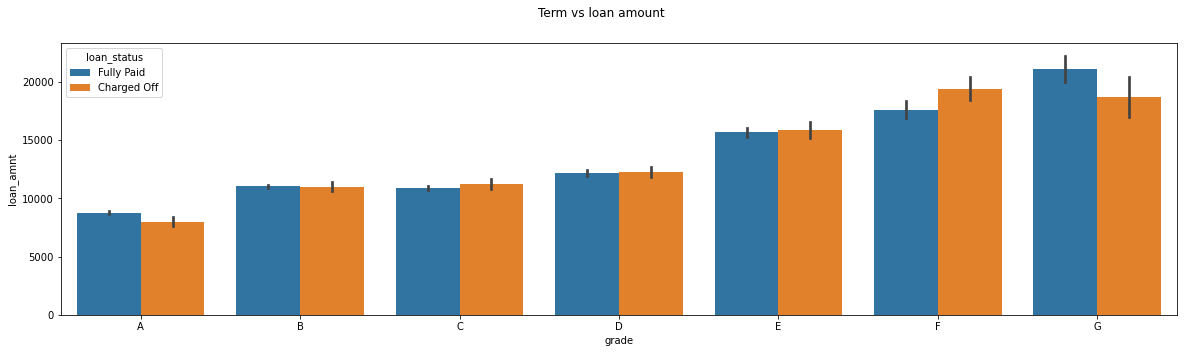

In [126]:
plt.figure(figsize=(20,5))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan,order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

#Charged off defaulters increases with downgrading of grade of borrowers.

In [193]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
df

,purpose,loan_status,id,percentage
0,car,Charged Off,151,0.105668
2,credit_card,Charged Off,501,0.104397
4,debt_consolidation,Charged Off,2623,0.150981
6,educational,Charged Off,49,0.165541
8,home_improvement,Charged Off,319,0.116679
10,house,Charged Off,58,0.166189
12,major_purchase,Charged Off,206,0.100243
14,medical,Charged Off,99,0.153488
16,moving,Charged Off,81,0.149723
18,other,Charged Off,578,0.160779


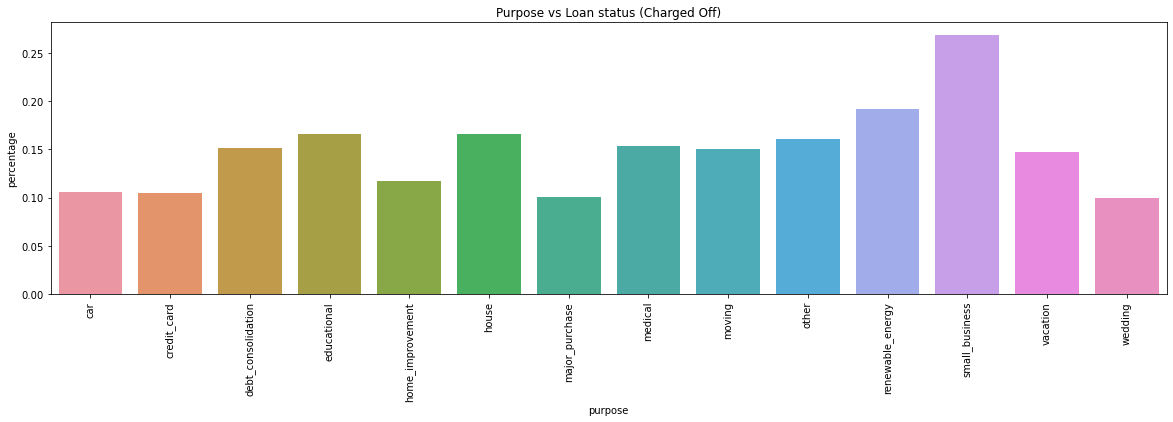

In [194]:
plt.figure(figsize=(20,5))
           
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

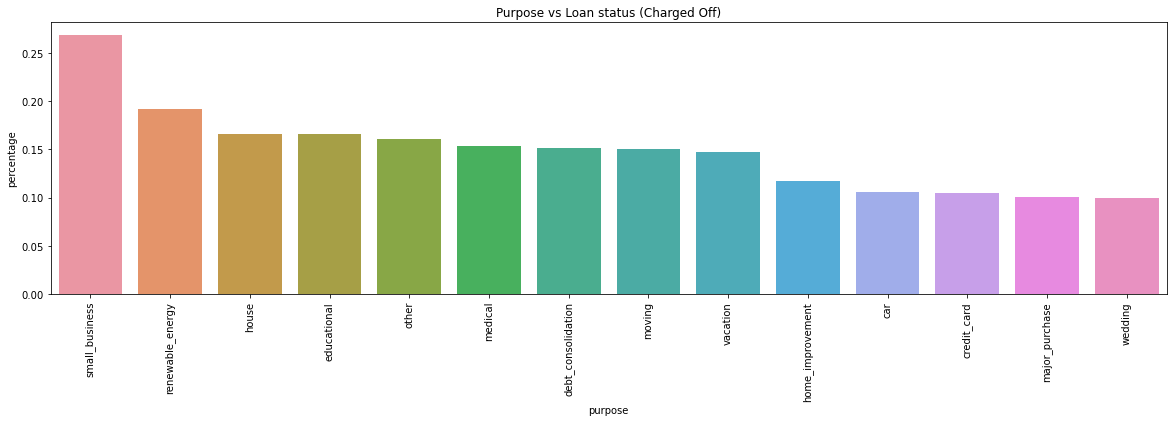

In [207]:
# DEFAULTERS BY PERCENTAGE

plt.figure(figsize=(20,5))

purpose_ord = df.sort_values('percentage',ascending=False).purpose

sns.barplot(x='purpose', y='percentage',data = df,order =purpose_ord)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

#Small business are considerable amount of defaulters BY PERCENTAGE among all charged off borrowers.

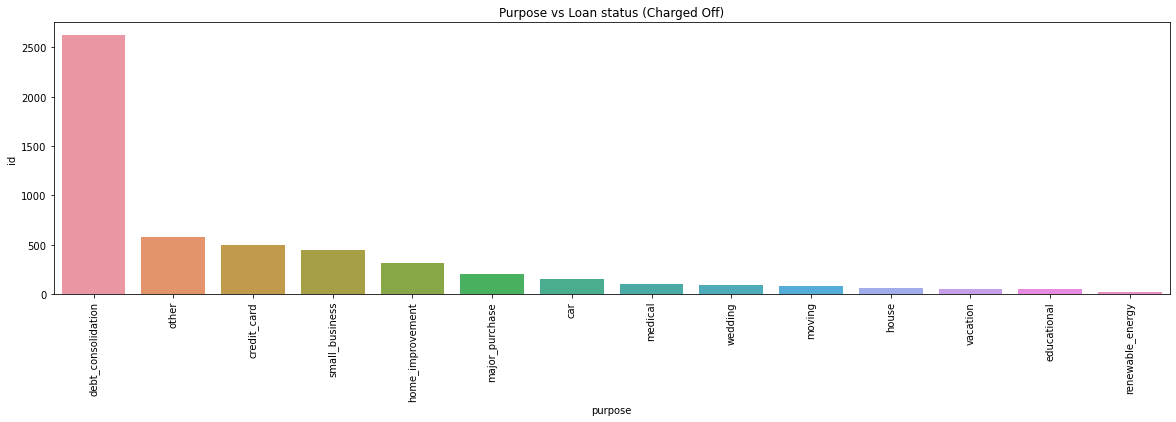

In [205]:
#DEFAULTERS BY COUNT

plt.figure(figsize=(20,5))

purpose_ord = df.sort_values('id',ascending=False).purpose 

sns.barplot(x = 'purpose',y = 'id',data = df,order = purpose_ord)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

#DEBT CONSOLIDATORS  are considerable amount of defaulters BY COUNT(id count) among all charged off borrowers.

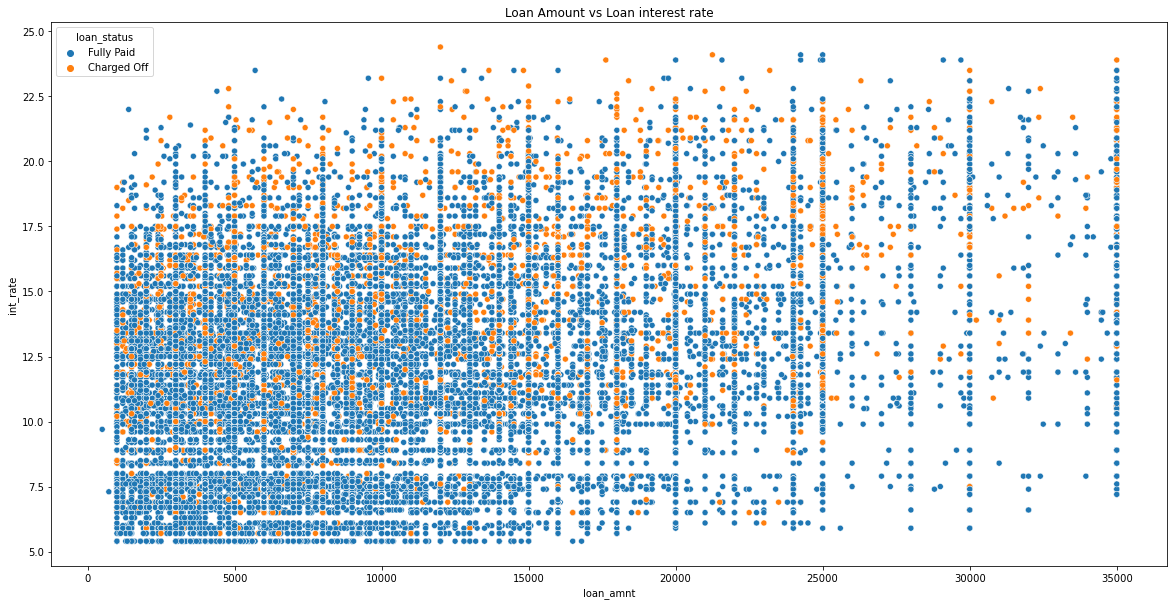

In [214]:
#Scatter plot for loan amount vs loan interest rate

plt.figure(figsize=(20,10))

sns.scatterplot(x='loan_amnt', y='int_rate', data=loan, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

# No correlation found

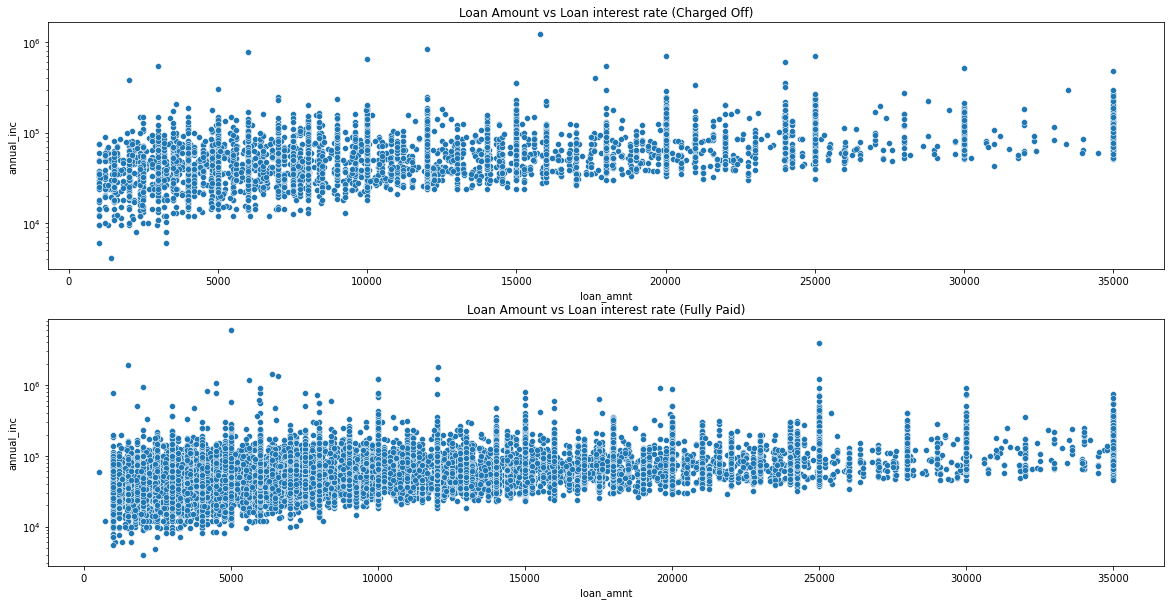

In [215]:
plt.figure(figsize=(20,10))

plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan[loan.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')

plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan[loan.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')

plt.show()

#Positive correlation is observed in both cases(charged off and fully paid) for loan amount vs interest rate.